# LAB 1.2: Feature Engineering i Preprocessing Danych

**Sztuczna Inteligencja - Semestr V**

**Prowadzący:** Łukasz Grala

---

## 🎯 Cele laboratorium:

1. ✅ Nauka preprocessingu danych (missing values, outliers)
2. ✅ Feature engineering (tworzenie nowych cech)
3. ✅ Kodowanie zmiennych kategorycznych
4. ✅ Skalowanie i normalizacja
5. ✅ Pierwsze modele ML (scikit-learn)
6. ✅ Train-test split i ewaluacja

---

## 📚 Źródła danych:

- **Titanic Dataset** (klasyfikacja - survival)
- **Boston Housing** (regresja - ceny)
- **UCI ML Repository**
- **Kaggle Datasets**

---

## Setup - Importy i konfiguracja

In [1]:
# Podstawowe biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn - preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Scikit-learn - modele
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Ustawienia
np.random.seed(42)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Wyłącz warningi
import warnings
warnings.filterwarnings('ignore')

print("✓ Biblioteki załadowane!")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")

✓ Biblioteki załadowane!
NumPy: 2.3.5
Pandas: 2.3.3


---
## CZĘŚĆ 1: Missing Values i Outliers

### Dataset: Titanic

**Cel:** Przewidzieć czy pasażer przeżył katastrofę

**Features:**
- `survived`: 0 = No, 1 = Yes (TARGET)
- `pclass`: Klasa biletu (1, 2, 3)
- `sex`: Płeć
- `age`: Wiek
- `sibsp`: Liczba rodzeństwa/małżonków na pokładzie
- `parch`: Liczba rodziców/dzieci na pokładzie
- `fare`: Cena biletu
- `embarked`: Port zaokrętowania (C, Q, S)

In [2]:
# Wczytanie danych Titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

print("Dataset Titanic:")
print(titanic.head())
print(f"\nWymiary: {titanic.shape}")
print(f"\nKolumny: {titanic.columns.tolist()}")

Dataset Titanic:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

### Zadanie 1.1: Analiza brakujących danych 
**Cel:** Zidentyfikować i zwizualizować missing values

In [3]:
# TODO 1: Sprawdź informacje o datasecie
# Użyj .info() aby zobaczyć typy danych i non-null counts
titanic.info()

# TODO 2: Policz missing values w każdej kolumnie
# Użyj .isnull().sum()
missing_values = titanic.isnull().sum()

# TODO 3: Oblicz procent brakujących danych
missing_percent = (missing_values / len(titanic)) * 100

# TODO 4: Stwórz DataFrame z podsumowaniem
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
# Posortuj malejąco i wyświetl
missing_df = missing_df.sort_values(by='Missing_Count', ascending=False)
print(missing_df)
# TODO 5: Wizualizacja missing values
# Stwórz heatmap pokazującą missing values
# Wskazówka: użyj sns.heatmap() z titanic.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
             Missing_Count  Missing_Percent
Cabin                  687        77.104377
Age                    177        19.865320
Embarked                 2         0.224467
PassengerId              0         0.000000
Name                    

### Zadanie 1.2: Obsługa Missing Values 

**Strategie:**
- **Age:** Imputacja medianą (wiele brakujących, ważna cecha)
- **Embarked:** Imputacja modą (mało brakujących)
- **Cabin:** Usuń kolumnę (>77% brakujących)

In [4]:
# TODO 1: Usuń kolumnę 'Cabin' (zbyt wiele missing values)
titanic_clean = titanic.copy()
# Twój kod:
titanic_clean = titanic_clean.drop(columns=["Cabin"])
print(titanic_clean.info())

# # TODO 2: Wypełnij brakujące wartości 'Age' medianą
# # Policz medianę
age_median = titanic_clean['Age'].median()
print(age_median)

# # TODO 3: Wypełnij brakujące wartości 'Embarked' modą (najczęstsza wartość)
# embarked_mode = # Twój kod (użyj .mode()[0])
# # Wypełnij brakujące
embarked_mode = titanic_clean['Embarked'].mode()[0]
titanic_clean['Embarked'].fillna(embarked_mode, inplace=True)

# # TODO 4: Sprawdź czy wszystkie missing values zostały obsłużone
print("\nBrakujące wartości po czyszczeniu:")
print(titanic_clean.isnull().sum())

# TODO 5: Alternatywnie - użyj SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
titanic_clean[['Age']] = imputer.fit_transform(titanic_clean[['Age']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
28.0

Brakujące wartości po czyszczeniu:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


### Zadanie 1.3: Wykrywanie Outliers 

**Metody:**
- IQR (Interquartile Range)
- Z-score
- Wizualizacja (Box plot)

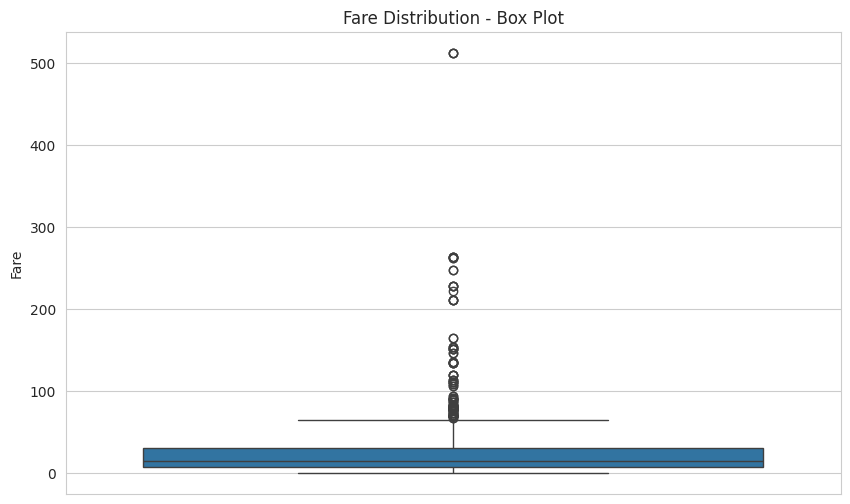


Liczba outliers w 'Fare': 116
Procent outliers: 13.02%


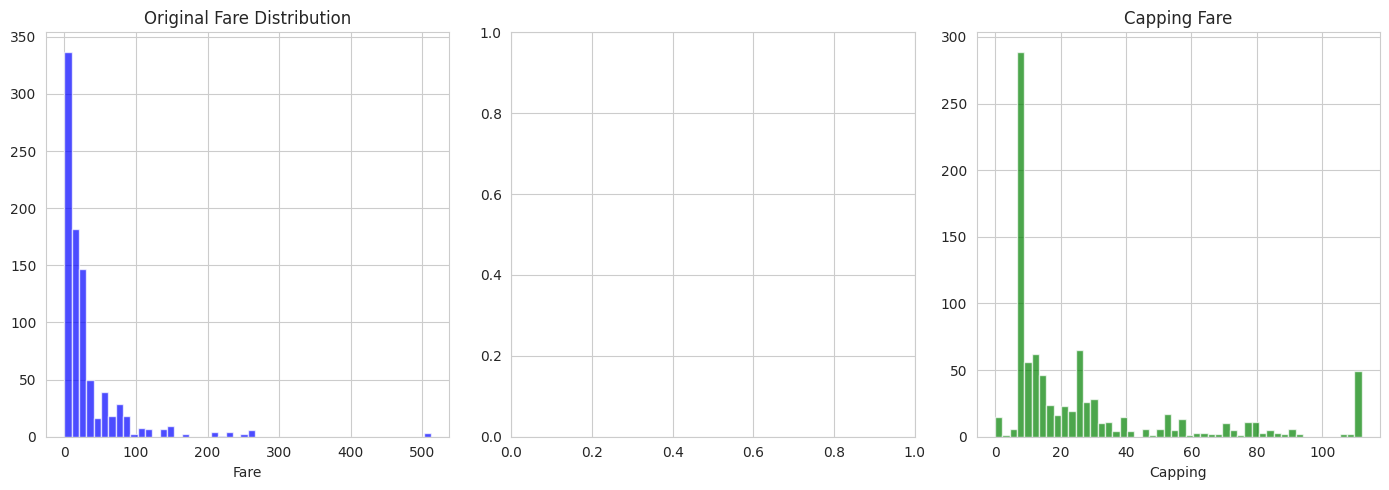

In [5]:
# TODO 1: Wizualizacja outliers w kolumnie 'Fare'
# Stwórz box plot
plt.figure(figsize=(10, 6))
# Twój kod: sns.boxplot()
sns.boxplot(y=titanic_clean['Fare'])

plt.title('Fare Distribution - Box Plot')
plt.show()

# TODO 2: Wykryj outliers metodą IQR
Q1 = titanic_clean['Fare'].quantile(0.25)
Q3 = titanic_clean['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Granice outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# TODO 3: Zidentyfikuj outliers
outliers = titanic_clean[(titanic_clean['Fare'] < lower_bound) | 
                         (titanic_clean['Fare'] > upper_bound)]

print(f"\nLiczba outliers w 'Fare': {len(outliers)}")
print(f"Procent outliers: {len(outliers)/len(titanic_clean)*100:.2f}%")

# TODO 4: Decyzja - co zrobić z outliers?
# Opcja A: Zachowaj (mogą być prawdziwe - First Class)
# Opcja B: Cap do percentyla 95
# Opcja C: Transformacja log

# Przykład cappingu:
# fare_95 = titanic_clean['Fare'].quantile(0.95)
# titanic_clean['Fare'] = titanic_clean['Fare'].clip(upper=fare_95)

# TODO 5: Porównaj rozkład przed i po transformacji
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Oryginalny
axes[0].hist(titanic_clean['Fare'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Original Fare Distribution')
axes[0].set_xlabel('Fare')

# # Po log transform (przykład)
# axes[1].hist(np.log1p(titanic_clean['Fare']), bins=50, color='green', alpha=0.7)
# axes[1].set_title('Log Transformed Fare')
# axes[1].set_xlabel('log(Fare + 1)')

titanic2 = titanic_clean.copy()
fare_95 = titanic2['Fare'].quantile(0.95)
titanic2['Fare'] = titanic2['Fare'].clip(upper=fare_95)

axes[2].hist(titanic2['Fare'], bins=50, color='green', alpha=0.7)
axes[2].set_title('Capping Fare')
axes[2].set_xlabel('Capping')

plt.tight_layout()
plt.show()

---
## CZĘŚĆ 2: Feature Engineering 

### Kodowanie zmiennych kategorycznych

### Zadanie 2.1: Label Encoding (5 min)

In [6]:
# # TODO 1: Zakoduj kolumnę 'Sex' (male/female → 0/1)
# # Metoda 1: Ręcznie z map()
titanic_clean['Sex_encoded'] = titanic_clean['Sex'].map({'male': 0, 'female': 1})

# # TODO 2: Alternatywnie - użyj LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Twój kod:
titanic_clean['Sex_encoded_le'] = le.fit_transform(titanic_clean['Sex'])

# # TODO 3: Sprawdź wynik
print("\nPorównanie oryginalnej i zakodowanej kolumny:")
print(titanic_clean[['Sex', 'Sex_encoded']].head(10))
print(titanic_clean[['Sex', 'Sex_encoded_le']].head(10))


Porównanie oryginalnej i zakodowanej kolumny:
      Sex  Sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0
5    male            0
6    male            0
7    male            0
8  female            1
9  female            1
      Sex  Sex_encoded_le
0    male               1
1  female               0
2  female               0
3  female               0
4    male               1
5    male               1
6    male               1
7    male               1
8  female               0
9  female               0


### Zadanie 2.2: One-Hot Encoding 

**Kiedy używać:** Dla zmiennych nominalnych (bez kolejności)

In [7]:
# # TODO 1: One-hot encode kolumny 'Embarked'
# # Metoda 1: pd.get_dummies()
embarked_dummies = pd.get_dummies(titanic_clean['Embarked'], 
                                   prefix='Embarked',
                                   drop_first=True)  # Unikaj dummy variable trap

# TODO 2: Dodaj nowe kolumny do DataFrame
titanic_clean = pd.concat([titanic_clean, embarked_dummies], axis=1)

# TODO 3: Sprawdź wynik
print("\nOne-hot encoded 'Embarked':")
print(titanic_clean[['Embarked', 'Embarked_Q', 'Embarked_S']].head(10))

# # TODO 4: One-hot encode 'Pclass'
# # Twój kod:

# # TODO 5: Alternatywnie - użyj sklearn OneHotEncoder
# # from sklearn.preprocessing import OneHotEncoder
# # ohe = OneHotEncoder(sparse=False, drop='first')
# # encoded = ohe.fit_transform(titanic_clean[['Embarked']])


One-hot encoded 'Embarked':
  Embarked  Embarked_Q  Embarked_S
0        S       False        True
1        C       False       False
2        S       False        True
3        S       False        True
4        S       False        True
5        Q        True       False
6        S       False        True
7        S       False        True
8        S       False        True
9        C       False       False


### Zadanie 2.3: Tworzenie nowych Features 
**Feature Engineering to sztuka!** Kreatywność jest kluczowa.

In [8]:
# # TODO 1: Stwórz feature 'FamilySize'
# # FamilySize = SibSp + Parch + 1 (pasażer sam)
titanic_clean['FamilySize'] = titanic_clean['SibSp'] + titanic_clean['Parch'] + 1

# # TODO 2: Stwórz feature 'IsAlone'
# # IsAlone = 1 jeśli FamilySize == 1, inaczej 0
# titanic_clean['IsAlone'] = # Twój kod
titanic_clean['IsAlone'] = titanic_clean['FamilySize'].map(lambda x: x == 1)

# # TODO 3: Stwórz feature 'Title' z kolumny 'Name'
# # Wyciągnij tytuł (Mr., Mrs., Miss., itp.) z imienia
# # Wskazówka: użyj str.extract() z regex
titanic_clean['Title'] = titanic_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# # TODO 4: Zgrupuj rzadkie tytuły
# # Zastąp rzadkie tytuły przez 'Rare'
title_counts = titanic_clean['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
titanic_clean['Title'] = titanic_clean['Title'].replace(rare_titles, 'Rare')

print("\nRozkład tytułów:")
print(titanic_clean['Title'].value_counts())

# # TODO 5: Stwórz feature 'AgeGroup'
# # Podziel wiek na grupy: Child (<16), Adult (16-60), Senior (>60)
titanic_clean['AgeGroup'] = pd.cut(titanic_clean['Age'], 
                                    bins=[0, 16, 60, 100],
                                    labels=['Child', 'Adult', 'Senior'])

# # TODO 6: Stwórz feature 'FarePerPerson'
# # Jeśli pasażer podróżuje z rodziną, podziel cenę biletu
titanic_clean['FarePerPerson'] = titanic_clean['Fare'] / titanic_clean['FamilySize']

# # TODO 7: Analiza nowych features
print("\nNowe features:")
print(titanic_clean[['FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'FarePerPerson']].head(10))

# # TODO 8: Sprawdź korelację nowych features z 'Survived'
# correlation = titanic_clean[['Survived', 'FamilySize', 'IsAlone']].corr()
# print("\nKorelacja z Survived:")
# print(correlation['Survived'].sort_values(ascending=False))


Rozkład tytułów:
Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

Nowe features:
   FamilySize  IsAlone   Title AgeGroup  FarePerPerson
0           2    False      Mr    Adult        3.62500
1           2    False     Mrs    Adult       35.64165
2           1     True    Miss    Adult        7.92500
3           2    False     Mrs    Adult       26.55000
4           1     True      Mr    Adult        8.05000
5           1     True      Mr    Adult        8.45830
6           1     True      Mr    Adult       51.86250
7           5    False  Master    Child        4.21500
8           3    False     Mrs    Adult        3.71110
9           2    False     Mrs    Child       15.03540


---
## CZĘŚĆ 3: Skalowanie i Normalizacja 

### Zadanie 3.1: Porównanie metod skalowania


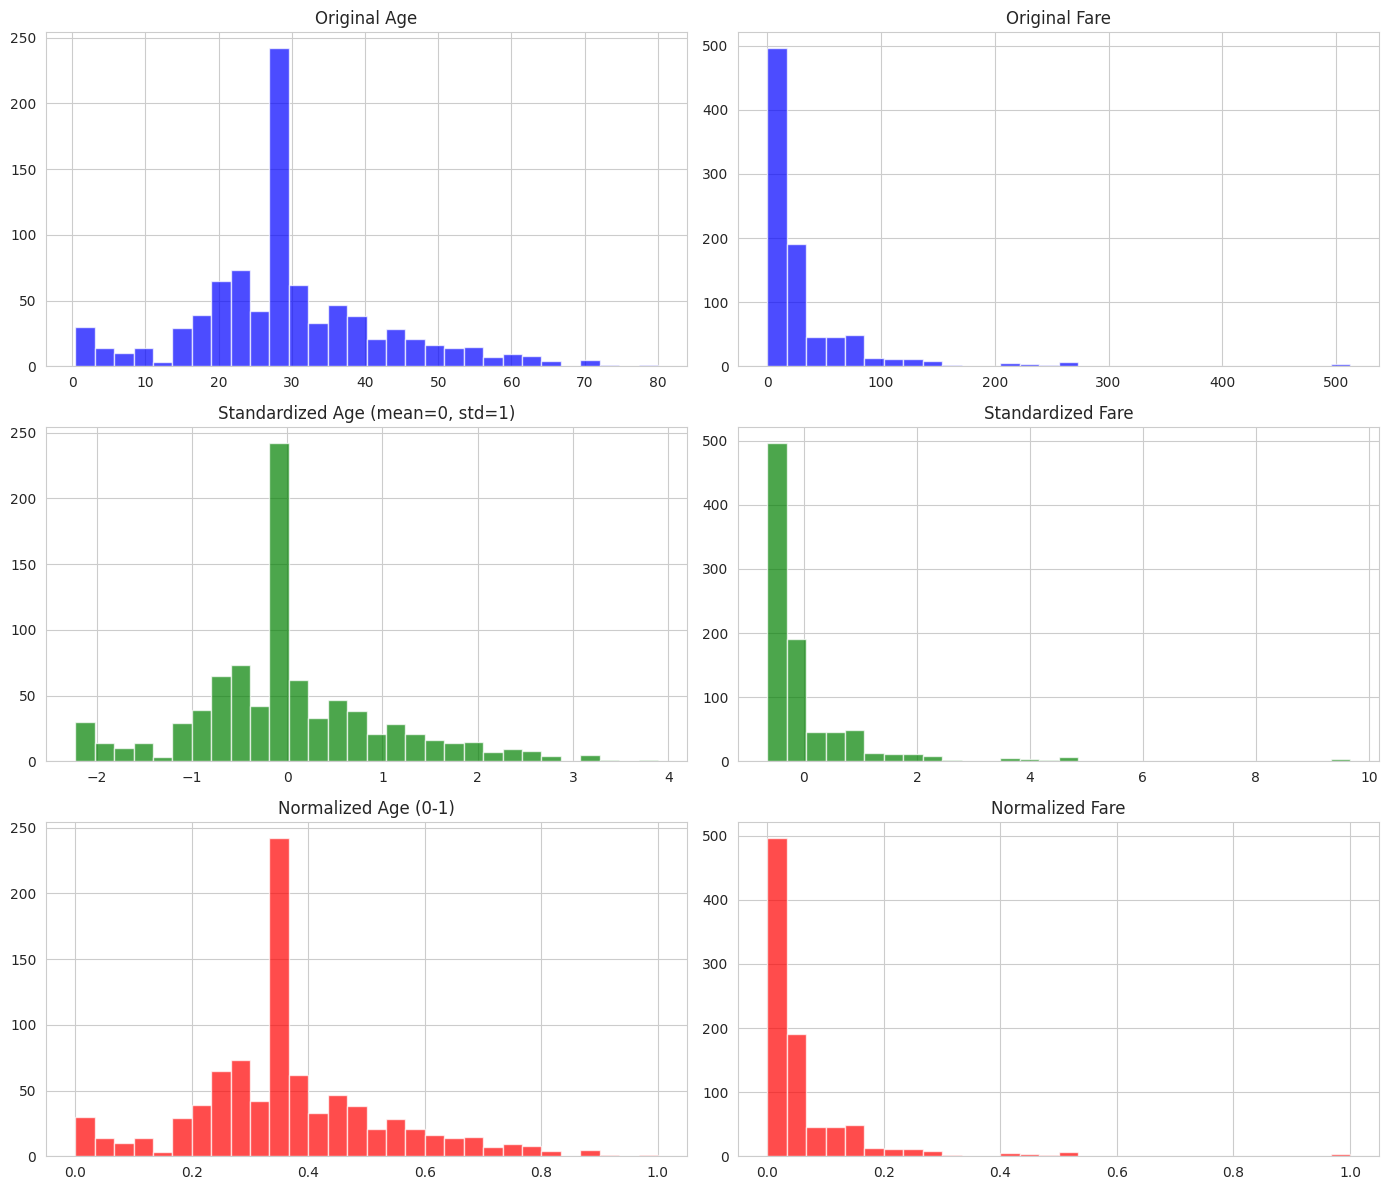


Statystyki po standardizacji:
Mean Age: 0.000000
Std Age: 1.000000

Statystyki po normalizacji:
Min Age: 0.000000
Max Age: 1.000000


In [9]:
# # Wybierzmy cechy numeryczne do skalowania
numeric_features = ['Age', 'Fare', 'FamilySize', 'FarePerPerson']

# # TODO 1: Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
# # Twój kod - fit_transform na numeric_features
scaled_std = scaler_std.fit_transform(titanic_clean[['Age', 'Fare']])

# TODO 2: Normalization (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
# Twój kod
scaled_minmax = scaler_minmax.fit_transform(titanic_clean[['Age', 'Fare']])

# TODO 3: Porównanie rozkładów
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Oryginalne
axes[0, 0].hist(titanic_clean['Age'].dropna(), bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Original Age')
axes[0, 1].hist(titanic_clean['Fare'], bins=30, color='blue', alpha=0.7)
axes[0, 1].set_title('Original Fare')

# Standardized
axes[1, 0].hist(scaled_std[:, 0], bins=30, color='green', alpha=0.7)
axes[1, 0].set_title('Standardized Age (mean=0, std=1)')
axes[1, 1].hist(scaled_std[:, 1], bins=30, color='green', alpha=0.7)
axes[1, 1].set_title('Standardized Fare')

# Normalized
axes[2, 0].hist(scaled_minmax[:, 0], bins=30, color='red', alpha=0.7)
axes[2, 0].set_title('Normalized Age (0-1)')
axes[2, 1].hist(scaled_minmax[:, 1], bins=30, color='red', alpha=0.7)
axes[2, 1].set_title('Normalized Fare')

plt.tight_layout()
plt.show()

# TODO 4: Sprawdź statystyki
print("\nStatystyki po standardizacji:")
print(f"Mean Age: {scaled_std[:, 0].mean():.6f}")  # Powinno być ~0
print(f"Std Age: {scaled_std[:, 0].std():.6f}")    # Powinno być ~1

print("\nStatystyki po normalizacji:")
print(f"Min Age: {scaled_minmax[:, 0].min():.6f}")  # Powinno być 0
print(f"Max Age: {scaled_minmax[:, 0].max():.6f}")  # Powinno być 1

### Zadanie 3.2: Kiedy której metody użyć?

**Eksperyment:** Porównaj wpływ skalowania na model

In [10]:
# TODO: Przygotuj dane do modelowania
# Wybierzmy proste features do demonstracji
features_for_model = ['Age', 'Fare', 'Sex_encoded', 'Pclass']
X = titanic_clean[features_for_model].copy()
y = titanic_clean['Survived']

# Train-test split (o tym więcej w następnej części)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO 1: Model BEZ skalowania
from sklearn.linear_model import LogisticRegression
model_no_scale = LogisticRegression(max_iter=1000)
# Trenuj i ewaluuj


# TODO 2: Model ZE standardizacją
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Uwaga: tylko transform!

model_with_scale = LogisticRegression(max_iter=1000)
# Trenuj i ewaluuj


# # TODO 3: Porównaj wyniki
# print("\nPorównanie accuracy:")
# print(f"Bez skalowania: {accuracy_no_scale:.4f}")
# print(f"Ze skalowaniem: {accuracy_with_scale:.4f}")
# print(f"\nRóżnica: {abs(accuracy_with_scale - accuracy_no_scale):.4f}")

---
## CZĘŚĆ 4: Pierwszy Model ML

### Scikit-learn Workflow

### Zadanie 4.1: Train-Test Split 

**Kluczowa zasada ML:** NIGDY nie trenuj na danych testowych!

In [11]:
# TODO 1: Przygotuj finalne features
# Wybierz najlepsze features na podstawie analizy
feature_columns = [
    'Age', 'Fare', 'FamilySize', 'IsAlone', 'FarePerPerson',
    'Sex_encoded', 'Pclass',
    'Embarked_Q', 'Embarked_S'
]

X = titanic_clean[feature_columns].copy()
y = titanic_clean['Survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# TODO 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% na test
    random_state=42,      # Reprodukowalność
    stratify=y            # Zachowaj proporcje klas
)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# TODO 3: Sprawdź balans klas
print("\nBalans klas w train set:")
print(y_train.value_counts(normalize=True))
print("\nBalans klas w test set:")
print(y_test.value_counts(normalize=True))

# TODO 4: Skalowanie (WAŻNE: fit tylko na train!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit + transform na train
X_test_scaled = scaler.transform(X_test)        # Tylko transform na test!

print("\n✓ Dane przygotowane do modelowania!")

Features shape: (891, 9)
Target shape: (891,)

Train set: (712, 9)
Test set: (179, 9)

Balans klas w train set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Balans klas w test set:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

✓ Dane przygotowane do modelowania!


### Zadanie 4.2: Logistic Regression

**Cel:** Przewidzieć czy pasażer przeżył (klasyfikacja binarna)

✓ Model wytrenowany!

Przykładowe prawdopodobieństwa (pierwsze 5 obserwacji):
Prob(0), Prob(1)
[[0.90198842 0.09801158]
 [0.93435812 0.06564188]
 [0.8652379  0.1347621 ]
 [0.94544343 0.05455657]
 [0.22743449 0.77256551]]

=== ACCURACY ===
Train Accuracy: 0.8048 (80.48%)
Test Accuracy: 0.7933 (79.33%)


<Figure size 800x600 with 0 Axes>

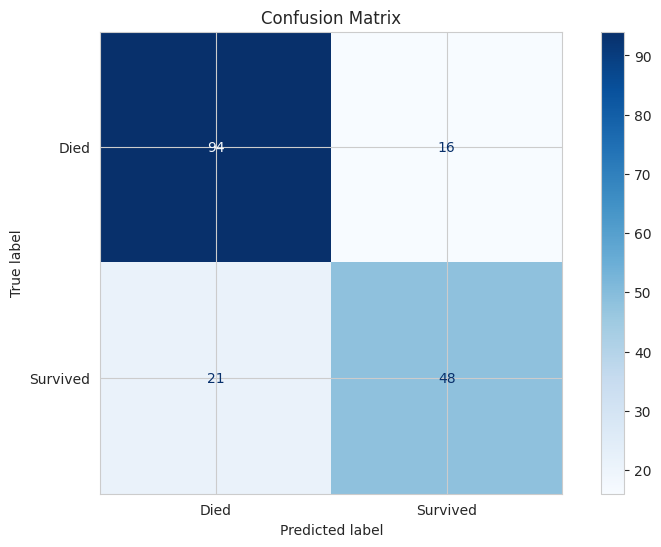


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

        Died       0.82      0.85      0.84       110
    Survived       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


=== FEATURE IMPORTANCE ===
         Feature  Coefficient
5    Sex_encoded     1.244077
6         Pclass    -0.892994
0            Age    -0.476038
2     FamilySize    -0.475661
3        IsAlone    -0.305022
8     Embarked_S    -0.144451
7     Embarked_Q     0.099010
4  FarePerPerson     0.064066
1           Fare     0.028283


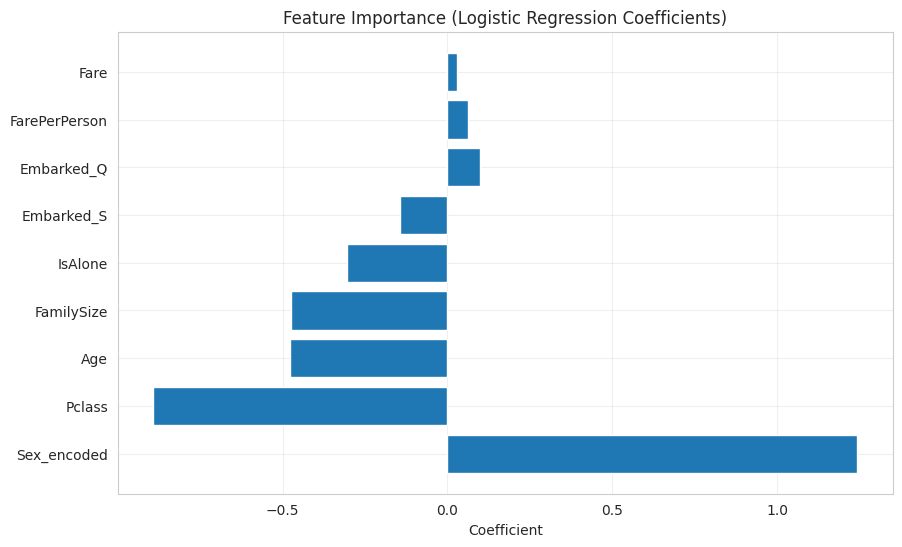

In [12]:
# TODO 1: Stwórz i wytrenuj model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
# Trenuj model
model.fit(X_train_scaled, y_train)

print("✓ Model wytrenowany!")

# TODO 2: Predykcje
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# TODO 3: Prawdopodobieństwa
y_proba_test = model.predict_proba(X_test_scaled)
print("\nPrzykładowe prawdopodobieństwa (pierwsze 5 obserwacji):")
print("Prob(0), Prob(1)")
print(y_proba_test[:5])

# TODO 4: Ewaluacja - Accuracy
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\n=== ACCURACY ===")
print(f"Train Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# TODO 5: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# TODO 6: Classification Report
from sklearn.metrics import classification_report

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_test, target_names=['Died', 'Survived']))

# TODO 7: Feature Importance
# Współczynniki regresji logistycznej pokazują ważność features
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(feature_importance)

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.grid(True, alpha=0.3)
plt.show()

### Zadanie 4.3: Model Comparison

**Porównaj różne modele klasyfikacyjne**

Logistic Regression: 0.7933
Decision Tree: 0.7933
Random Forest: 0.7933
SVM: 0.8045
KNN: 0.7877

=== MODEL COMPARISON ===
                 Model  Accuracy
3                  SVM  0.804469
0  Logistic Regression  0.793296
1        Decision Tree  0.793296
2        Random Forest  0.793296
4                  KNN  0.787709


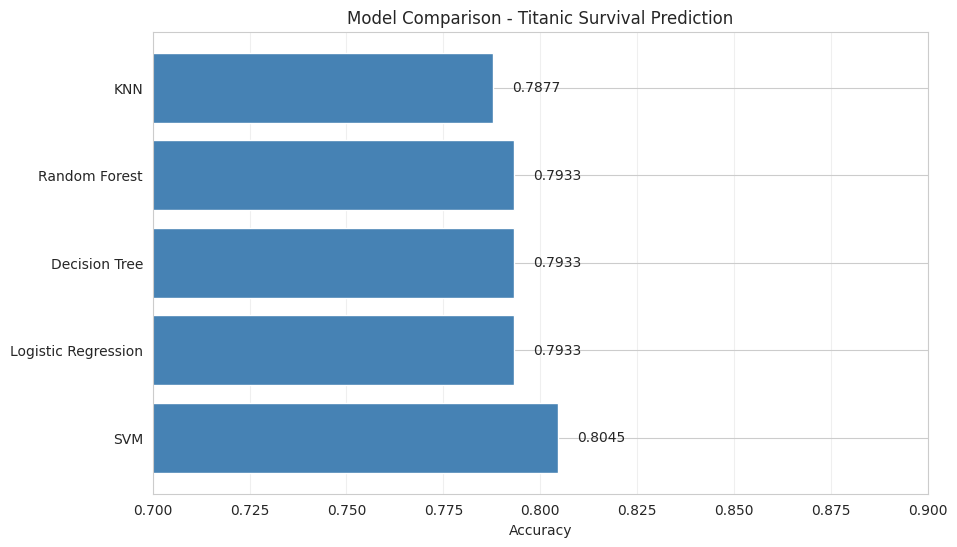


🏆 Najlepszy model: SVM z accuracy 0.8045


In [13]:
# TODO: Przetestuj różne modele
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Słownik modeli
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# TODO 1: Trenuj wszystkie modele i zbierz wyniki
results = []

for name, model in models.items():
    # Trenuj
    model.fit(X_train_scaled, y_train)
    
    # Predykuj
    y_pred = model.predict(X_test_scaled)
    
    # Ewaluuj
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy
    })
    
    print(f"{name}: {accuracy:.4f}")

# TODO 2: Stwórz DataFrame z wynikami
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\n=== MODEL COMPARISON ===")
print(results_df)

# TODO 3: Wizualizacja porównania
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='steelblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Titanic Survival Prediction')
plt.xlim([0.7, 0.9])
for i, v in enumerate(results_df['Accuracy']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')
plt.grid(True, alpha=0.3, axis='x')
plt.show()

print(f"\n🏆 Najlepszy model: {results_df.iloc[0]['Model']} z accuracy {results_df.iloc[0]['Accuracy']:.4f}")

---
## CZĘŚĆ 5: Regresja - Boston Housing 

**Dataset:** Ceny domów w Bostonie  
**Zadanie:** Przewidzieć cenę domu (regresja)

In [14]:
# Wczytanie danych Boston Housing
# Uwaga: load_boston() jest deprecated, użyjemy alternatywnego źródła
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Nazwy kolumn
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['PRICE'] = target

print("Boston Housing Dataset:")
print(boston_df.head())
print(f"\nShape: {boston_df.shape}")
print("\nFeatures:")
print("RM: Average number of rooms per dwelling")
print("LSTAT: % lower status of the population")
print("PRICE: Median value of homes (target) in $1000s")

Boston Housing Dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  

Shape: (506, 14)

Features:
RM: Average number of rooms per dwelling
LSTAT: % lower status of the population
PRICE: Median value of homes (target) in $1000s


### Zadanie 5.1: EDA i Feature Engineering dla Regresji

Statystyki opisowe:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std    

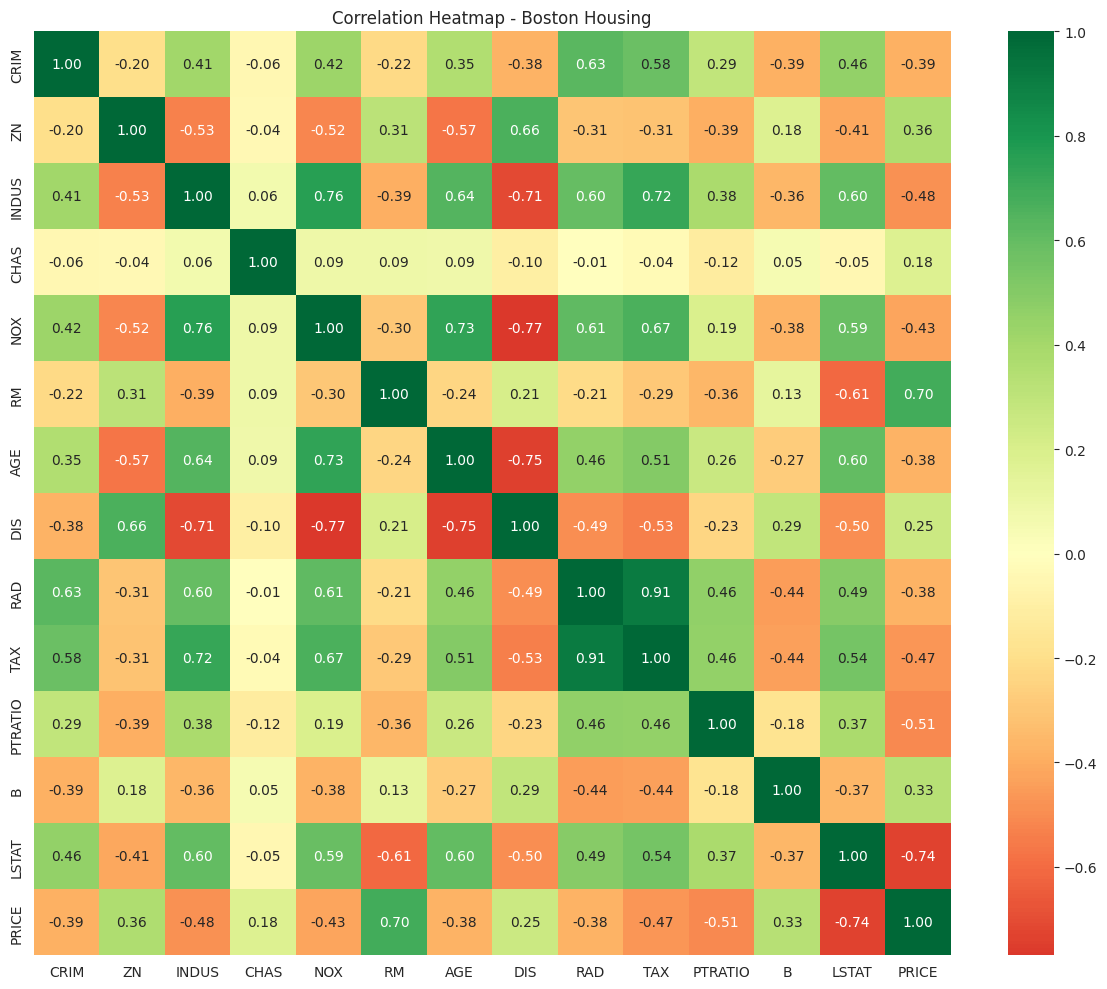

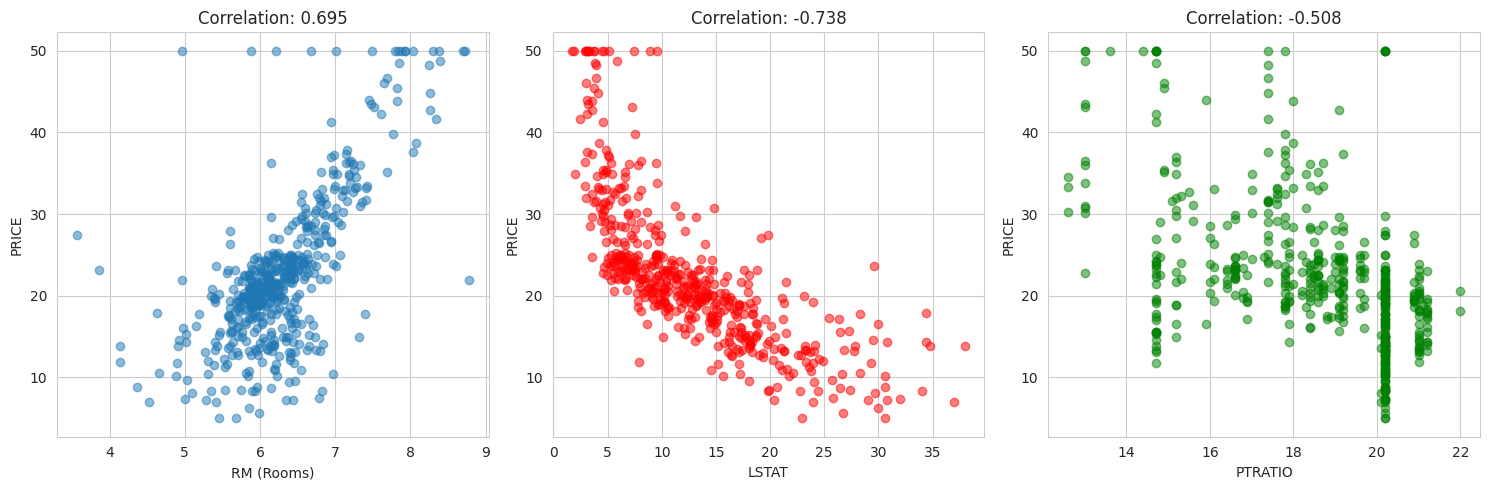

In [15]:
# TODO 1: Podstawowe statystyki
print("Statystyki opisowe:")
print(boston_df.describe())

# TODO 2: Sprawdź missing values
print("\nMissing values:")
print(boston_df.isnull().sum())

# TODO 3: Korelacja z target (PRICE)
correlation = boston_df.corr()['PRICE'].sort_values(ascending=False)
print("\nKorelacja z PRICE:")
print(correlation)

# TODO 4: Heatmap korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(boston_df.corr(), annot=True, fmt='.2f', cmap='RdYlGn', center=0)
plt.title('Correlation Heatmap - Boston Housing')
plt.tight_layout()
plt.show()

# TODO 5: Scatter plots - najważniejsze cechy
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RM vs PRICE
axes[0].scatter(boston_df['RM'], boston_df['PRICE'], alpha=0.5)
axes[0].set_xlabel('RM (Rooms)')
axes[0].set_ylabel('PRICE')
axes[0].set_title(f'Correlation: {boston_df["RM"].corr(boston_df["PRICE"]):.3f}')

# LSTAT vs PRICE
axes[1].scatter(boston_df['LSTAT'], boston_df['PRICE'], alpha=0.5, color='red')
axes[1].set_xlabel('LSTAT')
axes[1].set_ylabel('PRICE')
axes[1].set_title(f'Correlation: {boston_df["LSTAT"].corr(boston_df["PRICE"]):.3f}')

# PTRATIO vs PRICE
axes[2].scatter(boston_df['PTRATIO'], boston_df['PRICE'], alpha=0.5, color='green')
axes[2].set_xlabel('PTRATIO')
axes[2].set_ylabel('PRICE')
axes[2].set_title(f'Correlation: {boston_df["PTRATIO"].corr(boston_df["PRICE"]):.3f}')

plt.tight_layout()
plt.show()

### Zadanie 5.2: Linear Regression

=== REGRESSION METRICS ===

TRAIN SET:
  MSE:  21.64
  RMSE: 4.65
  MAE:  3.31
  R²:   0.7509

TEST SET:
  MSE:  24.29
  RMSE: 4.93
  MAE:  3.19
  R²:   0.6688


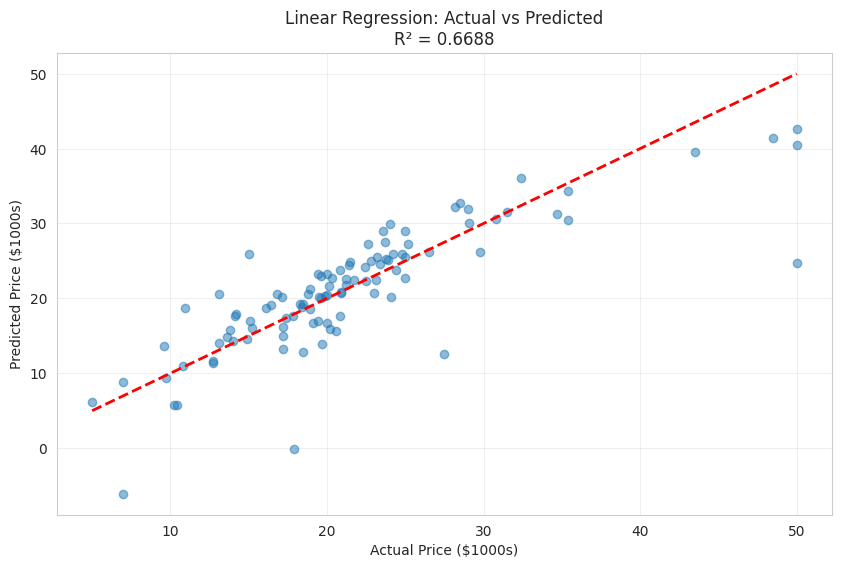

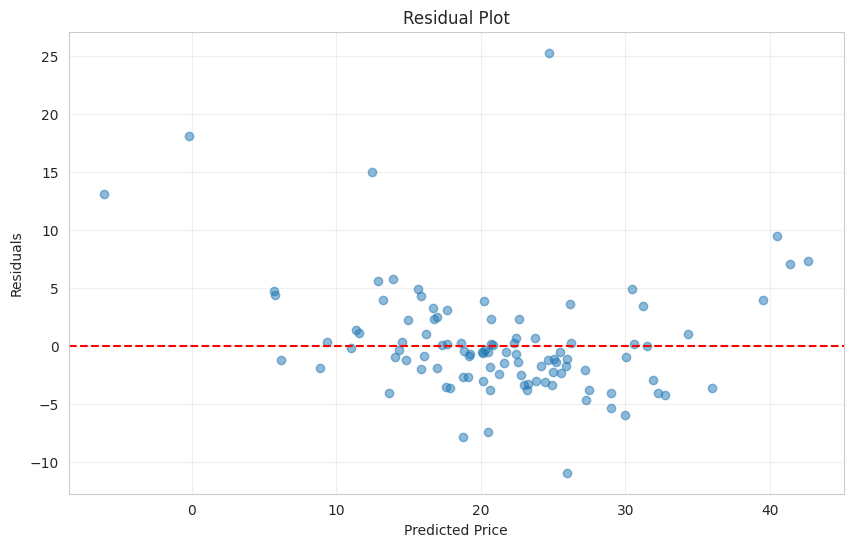


=== FEATURE IMPORTANCE ===
    Feature  Coefficient
12    LSTAT    -3.611658
5        RM     3.145240
7       DIS    -3.081908
8       RAD     2.251407
10  PTRATIO    -2.037752
4       NOX    -2.022319
9       TAX    -1.767014
11        B     1.129568
0      CRIM    -1.002135
3      CHAS     0.718738
1        ZN     0.696269
2     INDUS     0.278065
6       AGE    -0.176048


In [16]:
# TODO 1: Przygotuj dane
X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

# TODO 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TODO 3: Skalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO 4: Trenuj model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# TODO 5: Predykcje
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# TODO 6: Ewaluacja
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("=== REGRESSION METRICS ===")
print(f"\nTRAIN SET:")
print(f"  MSE:  {train_mse:.2f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE:  {train_mae:.2f}")
print(f"  R²:   {train_r2:.4f}")

print(f"\nTEST SET:")
print(f"  MSE:  {test_mse:.2f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE:  {test_mae:.2f}")
print(f"  R²:   {test_r2:.4f}")

# TODO 7: Wizualizacja predykcji vs rzeczywiste
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title(f'Linear Regression: Actual vs Predicted\nR² = {test_r2:.4f}')
plt.grid(True, alpha=0.3)
plt.show()

# TODO 8: Residuals (błędy)
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

# TODO 9: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(feature_importance)

---
## PODSUMOWANIE LAB 1.2

### Czego się nauczyłeś:

✅ **Preprocessing:**
- Obsługa missing values (imputation, deletion)
- Wykrywanie i obsługa outliers (IQR, Z-score)
- Analiza i czyszczenie danych

✅ **Feature Engineering:**
- Kodowanie kategorii (Label, One-Hot)
- Tworzenie nowych features
- Feature selection

✅ **Skalowanie:**
- Standardization (StandardScaler)
- Normalization (MinMaxScaler)
- Kiedy której metody użyć

✅ **Machine Learning:**
- Scikit-learn API
- Train-test split
- Logistic Regression (klasyfikacja)
- Linear Regression (regresja)
- Metryki ewaluacji

---

### Kluczowe wnioski:
0. **Moje wnioski**
   - Przekonałem się, jak ważna jest jakość danych w machine learningu. Wydaję mi się, że w pracy przy tworzeniu AI ważniejsze jest właśnie w dobrej selekcji i inżynierii danych, niż sama matma i modele uczenia, w które "wrzucamy" nasze dane. Użycie gotowego modelu to kwestia importu i odpalenia biblioteki - ogarnięcie danych już niekoniecznie


1. **Feature Engineering > Algorytm**
   - Dobre features mogą poprawić accuracy o 10-30%
   - To wymaga kreatywności i znajomości domeny

2. **Data Leakage**
   - NIGDY nie fit preprocessing na test set
   - Train-test split NA POCZĄTKU

3. **Skalowanie jest kluczowe**
   - Dla modeli bazujących na odległości
   - Dla gradient descent (neural networks)

4. **Zawsze waliduj**
   - Test set pozostaje nietknięty
   - Używaj cross-validation

---

### Następne zajęcia:

**Lab 2.1: Wprowadzenie do Sieci Neuronowych**
- Perceptron
- Forward/Backward propagation
- Pierwsza sieć neuronowa w NumPy

---

### Zadanie:

1. Dokończ wszystkie zadania z dzisiejszych zajęć i wyślij poprawny notebook
2. Eksperymentuj z różnymi kombinacjami features
3. Spróbuj ulepszyć accuracy powyżej 82% dla Titanic
4. Poczytaj o innych technikach feature engineering

---

**Kontakt:** lukasz.grala@cdv.pl

**Źródła danych:**
- Kaggle: https://www.kaggle.com/datasets
- UCI: https://archive.ics.uci.edu/ml/
- Scikit-learn: https://scikit-learn.org/stable/datasets.html

**Powodzenia!** 🚀